# LAB 03 : Ensemble Learning (Ensemble methods) with Scikit-Learn

**Full Name** : Azamat Zulpykhar

### Task :

- The students have to analyse the results. 
- In this tutorial, your goal is to examine one of the decision tree problems. 
- We will try to solve this problem with parameterization. 
- Then, we will introduce random forests.

### Tools & libraries : 
- Python, Jupyter, pandas, scikit-learn, numpy, timeit, graphviz

### DATASETS : 
- [Cars Data](https://www.kaggle.com/abineshkumark/carsdata) (classification).


## 1. INTRODUCTION

- **Ensemble methods** aim to improve **generalizability** and **robustness** of an algorithm (single estimator) by combining the predictions of several base estimators [1,2]. 
- **The estimators** are built with a given Machine Learning algorithm.s, e.g: Decision Tree like CART and ID3, etc.
- To acheive this there are two general methods
  - (1) Averaging : 
      - Principle : Build several estimators independently and then to **Average** their predictions. 
      - Usually, The combined estimator is better than any of the single base estimator because its variance is reduced.
      - e.g., Bagging methods, Forests of randomized trees, etc.
  - (2) Boosting :
      - Principle : Weak Estimators are built sequentially, with each estimator attempting to reduce the bias of the predecessor (the combined estimator).
      - The weak learners often only have a slight performance advantage over random guessing.
      - The motivation is to combine several weak models to produce a powerful ensemble.
      - By focusing on training samples that are hard to classify, the overall performance of the ensemble is improved.
      - Boosting can lead to a decrease in bias and variance, but algorithms such as AdaBoost are also known for overfitting to the training data (high variance)
      - e.g., AdaBoost, Gradient Tree Boosting, etc.
      
 ==============================================================================================================================

In this lab, we aim to investigate one of the decision tree problems. We will try to solve this problem with parameterization. Then, we will introduce random forests.

*PS : This tutorial does not contain any coding part.  You only have to analyse the results obtained (and to learn of course).*

## 2- Decision tree 

Here, we use decision trees to point out one of the problems that can arise in this type of learning. 


### 2-1- Data preprocessing

We use the [Cars Data] dataset (https://www.kaggle.com/abineshkumark/carsdata) to classify the cars into three classes: US., Euroupe. or Japan. 

**Nothing to analyse here**.

In [101]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

In [102]:
# Reading the dataset
cars_data = pd.read_csv('datasets/cars.csv', skipinitialspace=True)
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


In [103]:
# We have noticed that the type of the "cubicinches" feature is not well detected 
# Also, there is some missing data : 259 valid inputs out of 261
cars_data["cubicinches"] = pd.to_numeric(cars_data["cubicinches"])
# remove missing values
cars_data.dropna(inplace=True)
# Yay! We did it! Here are the first lines of our dataset
cars_data.head(10)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.
5,23.0,8,350.0,125,3900.0,17,1980,US.
6,13.0,8,351.0,158,4363.0,13,1974,US.
7,14.0,8,440.0,215,4312.0,9,1971,US.
8,25.4,5,183.0,77,3530.0,20,1980,Europe.
9,37.7,4,89.0,62,2050.0,17,1982,Japan.


In [104]:
# Just to check, once again, that all types of gfeatures are numeric
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          256 non-null    float64
 1   cylinders    256 non-null    int64  
 2   cubicinches  256 non-null    float64
 3   hp           256 non-null    int64  
 4   weightlbs    256 non-null    float64
 5   time-to-60   256 non-null    int64  
 6   year         256 non-null    int64  
 7   brand        256 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 18.0+ KB


In [105]:
# Slit into X and Y
X = cars_data.values[:, :-1]
Y = cars_data.values[:,-1]

X[:10], Y[:10]

(array([[14.0, 8, 350.0, 165, 4209.0, 12, 1972],
        [31.9, 4, 89.0, 71, 1925.0, 14, 1980],
        [17.0, 8, 302.0, 140, 3449.0, 11, 1971],
        [15.0, 8, 400.0, 150, 3761.0, 10, 1971],
        [30.5, 4, 98.0, 63, 2051.0, 17, 1978],
        [23.0, 8, 350.0, 125, 3900.0, 17, 1980],
        [13.0, 8, 351.0, 158, 4363.0, 13, 1974],
        [14.0, 8, 440.0, 215, 4312.0, 9, 1971],
        [25.4, 5, 183.0, 77, 3530.0, 20, 1980],
        [37.7, 4, 89.0, 62, 2050.0, 17, 1982]], dtype=object),
 array(['US.', 'Europe.', 'US.', 'US.', 'US.', 'US.', 'US.', 'US.',
        'Europe.', 'Japan.'], dtype=object))

### 2-2- Training and testing

We train two decision tree models using [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) of scikit-learn: 
- **cart**: the default settings of scikit-learn (Gini and 2 min samples in a leaf).
- **cart7** : Gini, and we set the max depth to 7.

For evaluation : we use the "Accuracy" Metric since in the case of multi-class ranking, Accuracy = Precision = Recall (Check the formula. 
See [this blog](https://simonhessner.de/why-are-precision-recall-and-f1-score-equal-when-using-micro-averaging-in-a-multi-class-problem/) for why R=P in multi-class ranking.

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import timeit
from sklearn.metrics import accuracy_score

# You can modify that for running your model for more epochs
NBR_RUN = 20

# To assess the convergence of the model
# Save the results in a dictionary 

conv = { "cart" : [], "cart7": [] }
train_times = { "cart" : [], "cart7": [] }

# To evaluate the performance on test data
# Save the results in a dictionary 

test_times = { "cart" : [], "cart7": [] }
perf = { "cart": [], "cart7": [] }


for run in range(NBR_RUN): 
    # Data preprocessing
    # Train-Test Split : 70%-30% 
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=12) 
    
    # ==================================
    # TRAINING  
    # ==================================
    
    # CART : Initialization 
    cart = DecisionTreeClassifier() 
    # CART : Training
    start_time = timeit.default_timer()
    cart.fit(X_train, Y_train)
    end_time = timeit.default_timer()
    # save the training time
    train_times["cart"].append(end_time-start_time)
    
    # CART7 : Initialization of classifier of max depoth equal to 7
    cart7 = DecisionTreeClassifier(max_depth=7) 
    # CART7 : Training
    start_time = timeit.default_timer()
    cart7.fit(X_train, Y_train)
    end_time = timeit.default_timer()
    # save the training time
    train_times["cart7"].append(end_time-start_time)
        
    # ==================================
    # Training Evaluation
    # ==================================
    
    Y_cart_train = cart.predict(X_train)
    conv["cart"].append(accuracy_score(Y_train, Y_cart_train))
    Y_cart7_train = cart7.predict(X_train)
    conv["cart7"].append(accuracy_score(Y_train, Y_cart7_train))
        
    # ==================================
    # TEST Evaluation
    # ==================================
    
    # CART : Evaluation on test set
    start_time = timeit.default_timer()
    Y_cart_test = cart.predict(X_test)
    end_time = timeit.default_timer()
    # Save Evaluation Time
    test_times["cart"].append(end_time-start_time)
    
    # CART7 : Evaluation on test set
    start_time = timeit.default_timer()
    Y_cart7_test = cart7.predict(X_test)
    end_time = timeit.default_timer()
    # Save Evaluation Time
    test_times["cart7"].append(end_time - start_time)
    
    # Save evaluation results
    perf["cart"].append(accuracy_score(Y_test, Y_cart_test))
    perf["cart7"].append(accuracy_score(Y_test, Y_cart7_test))

In [107]:
# Here is the maximum depth of the two decision trees (last RUN)
print("CART (Default) Depth :", cart.get_depth())
print("CART7 Depth :", cart7.get_depth())

CART (Default) Depth : 10
CART7 Depth : 7


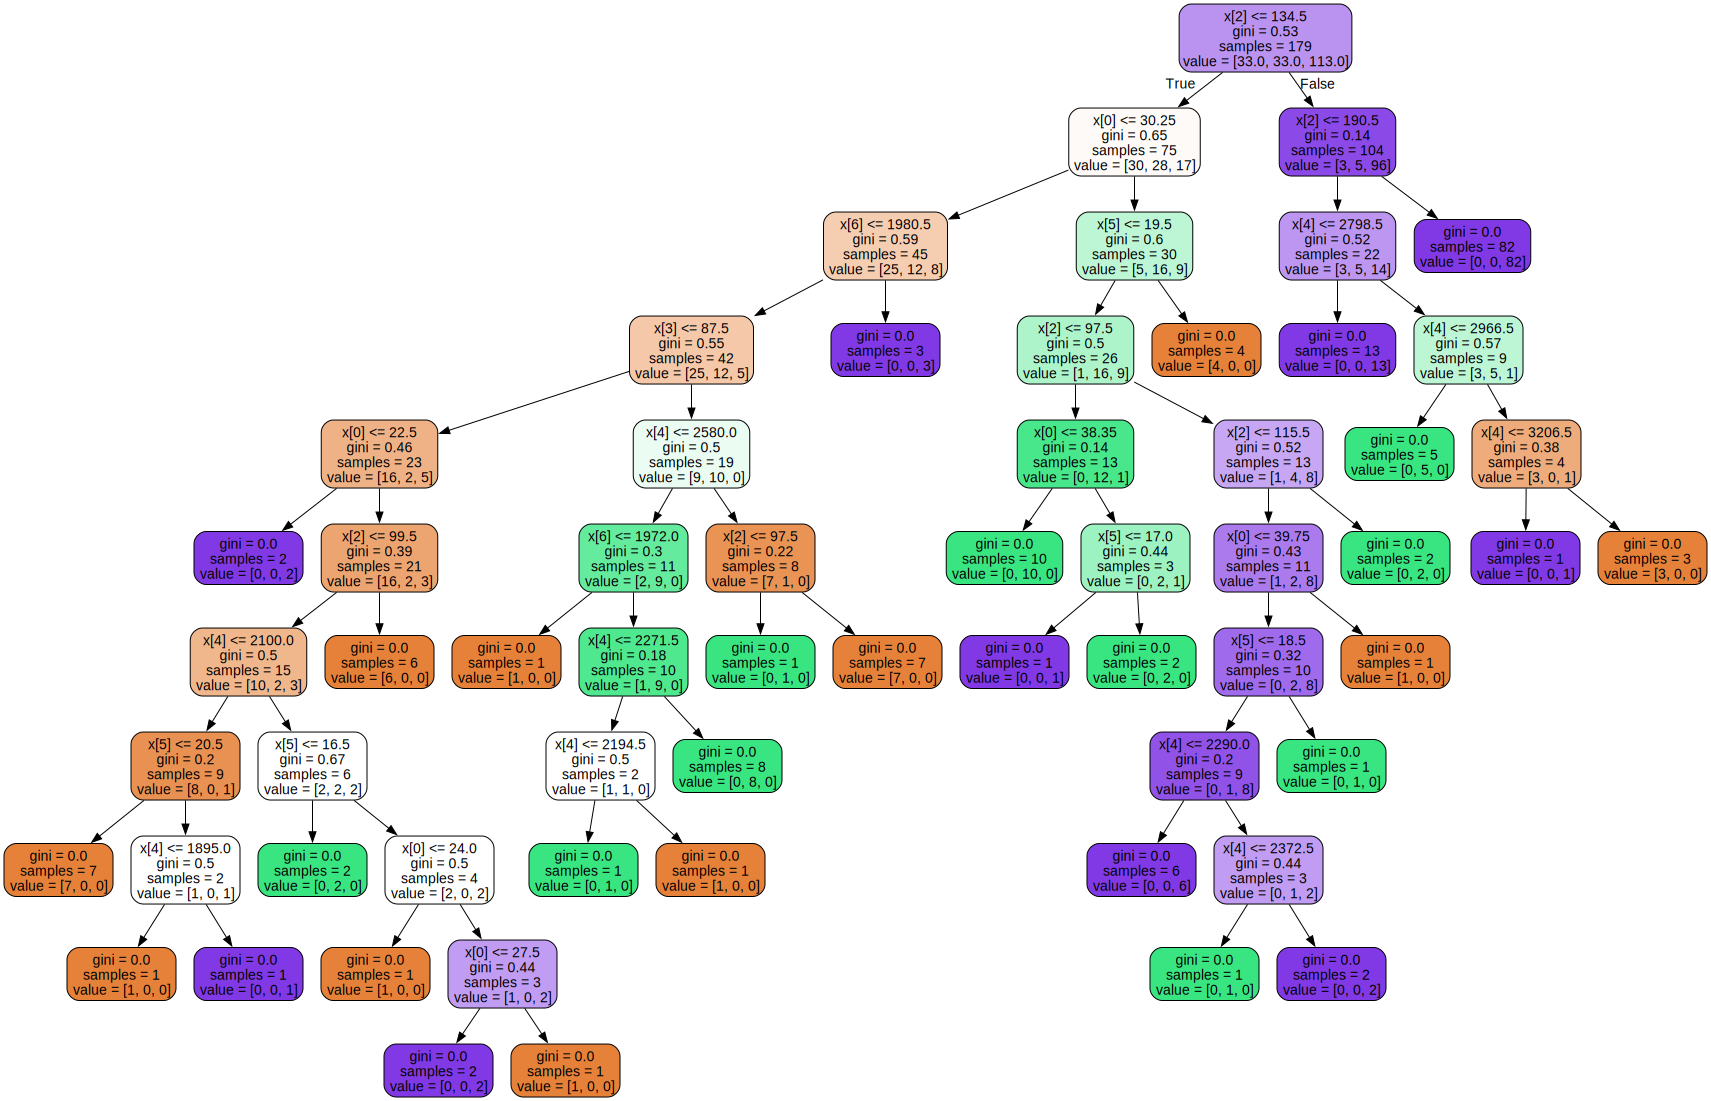

In [108]:
# this is just to visualise the CART tree (not limited by depth). it's going to nbe a big tree.
# Don't worry, you don't need this in the analysis

from sklearn.tree import export_graphviz
from IPython.display import SVG, display
from graphviz import Source

graph = export_graphviz(cart, rounded = True, proportion = False, precision = 2, filled = True)
graph = Source(graph)
display(SVG(graph.pipe(format='svg')))

### 2-3- Analysis of the training phase

**[Q1]** **Analyse the following results** :
- Training time : The min, the better.
- Convergence of the model : "how well the model fits the data". (The higher, the better) 

Here, we have drawn the metrics in relation to the runs. 
The order of the runs is not important.
The most important thing is that a model must be stable with respect to another model on the different runs, otherwise there is a problem somewhere.

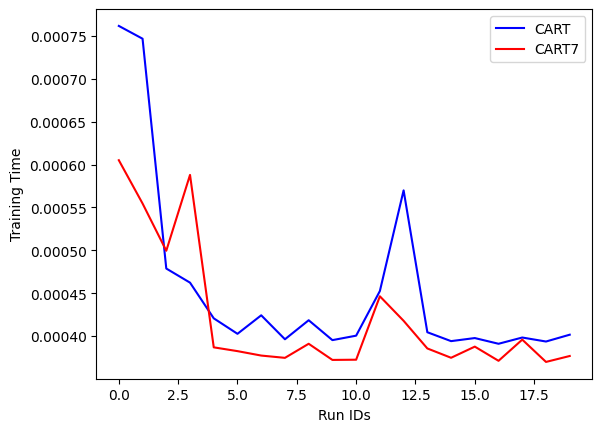

In [109]:
# Le temps d'entraînement 
# pd.DataFrame(temps_train)

plt.plot(range(NBR_RUN), train_times["cart"], color="blue", label="CART")
plt.plot(range(NBR_RUN), train_times["cart7"], color="red", label="CART7")
plt.ylabel("Training Time")
plt.xlabel("Run IDs")
plt.legend()
# plt.rcParams["figure.figsize"] = (3,7)
plt.show()

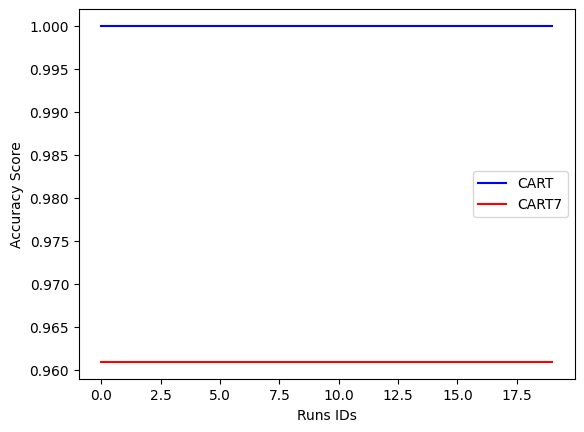

In [110]:
# La convergence
#pd.DataFrame(conv)

plt.plot(range(NBR_RUN), conv["cart"], color="blue", label="CART")
plt.plot(range(NBR_RUN), conv["cart7"], color="red", label="CART7")
plt.ylabel("Accuracy Score")
plt.xlabel("Runs IDs")
plt.legend()
# plt.rcParams["figure.figsize"] = (3,7)
plt.show()

**Your Answer (A1) :**
[ Write your answer here ]

- We can see that training time in both models are relatively similar
- On the initial run and around 12-15 run there is a spike in training time
- Initial spike might be caused by python intrepreter internal processes of optimzation or loading data into memory
- On sequentials runs some variables might be cached and allow faster training time
- Cart without max depth limit is generally taking a little more time 
- Cart7 with restricted depth takes less or equal time on each run because it after 7 levels it stops trying to expand nodes
- Convergence in both are stable throughout runs and are similarly high
- Cart without depth limit has perfect convergence of 1 as it was not restricted on node expansion
- Cart7 is slightly less convergent due to the restricted depth of the tree

### 2-4- Analysis of the evaluation on test set

**[Q2]** **Analyze the following results** :
1. Test time 
2. Evaluation of performance on test data
3. We also want to know if the best convergence guarantees a better classification in the testset. If not, what is the problem in the case of the "CART" model ?

- Here we have drawn the metrics in relation to the runs. 
- The order of the runs is not important.
- What is important is that one model must be stable with respect to another on the different runs

In [111]:
# Prediction time
pd.DataFrame(test_times)

,cart,cart7
0,0.000060,0.000048
1,0.000063,0.000050
2,0.000054,0.000046
3,0.000050,0.000042
4,0.000044,0.000041
5,0.000045,0.000041
6,0.000045,0.000042
7,0.000046,0.000043
8,0.000045,0.000041
9,0.000044,0.000040


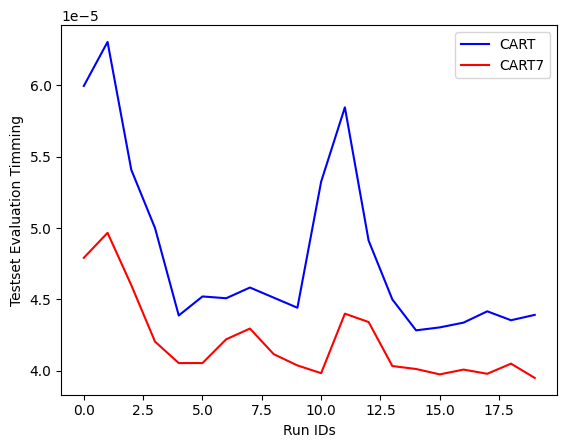

In [112]:
# Plotting prediction time
plt.plot(range(NBR_RUN), test_times["cart"], color="blue", label="CART")
plt.plot(range(NBR_RUN), test_times["cart7"], color="red", label="CART7")
plt.ylabel("Testset Evaluation Timming")
plt.xlabel("Run IDs")
plt.legend()
#plt.rcParams["figure.figsize"] = (3,7)
plt.show()

In [113]:
# Print Performance Scores
pd.DataFrame(perf)

,cart,cart7
0,0.753247,0.753247
1,0.818182,0.779221
2,0.766234,0.766234
3,0.766234,0.753247
4,0.805195,0.779221
5,0.779221,0.766234
6,0.766234,0.779221
7,0.727273,0.727273
8,0.753247,0.792208
9,0.740260,0.779221


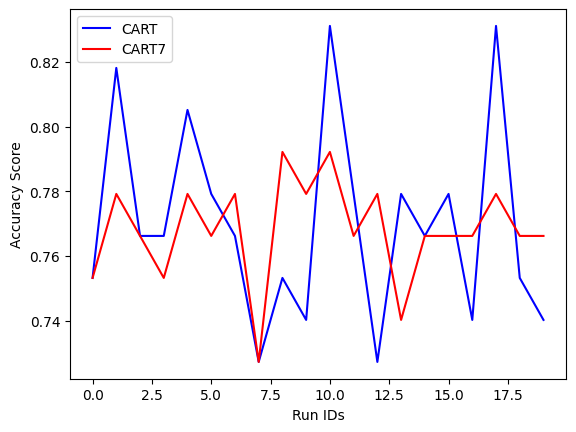

In [114]:
# Plot Performance Evaluation scores
plt.plot(range(NBR_RUN), perf["cart"], color="blue", label="CART")
plt.plot(range(NBR_RUN), perf["cart7"], color="red", label="CART7")
plt.ylabel("Accuracy Score")
plt.xlabel("Run IDs")
plt.legend()
#plt.rcParams["figure.figsize"] = (3,7)
plt.show()

**Your Answer (A2) :**
[ Write your answer here ]

- Evaluation time of both models on test data follow similar pattern and repeat situation as in training time, first and runs at the middle might be spiked due to grabage collection, caching, intrepreter or library internal processes
- In general the evaulation time is small
- Performance of both models on test set spikes throughout the runs. 
- CART7 accuracy is seen generally lower than of CART
- Moth models are not stabely convergent and the accuracy is much smaller than in training evaluation, that might be indicatoin of overfitting of the models and they are not able to generilze the rules
- Best convergence does not guarantee better classification because model might trained too weel for the training data and not general enough to show stable high results in the actual test set.
- Depth of the model looks like impacting accuaracy greatly but still it allowed CARt7 to be more stable

## 3- Random Forest

The following are the basic steps involved in running the random forest algorithm:

- Choose N random data samples from the dataset.
- Build a decision tree based on these N samples.
- Choose the desired number of trees in your algorithm and repeat steps 1 and 2.
- The result:
   - In case of regression, for a new record, each tree in the forest predicts a value for Y (output). The final value can be calculated by taking the average of all the values predicted by all trees in the forest. 
   - In case of classification, each tree in the forest predicts the category to which the new record belongs. Finally, the new record is assigned to the category that wins the majority vote.

### 3-1- Data preprocessing

We use the same dataset as before 

### 3-2- Training and testing

We train two models of decision trees with [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) of scikit-learn: 
- **cart_2**: the default settings of scikit-learn (Gini and 2 min samples in a leaf)
- **cart7_2**: default Gini, and we set the max depth to 7

Also, we use [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to train a random forest model: 
- *forest*: default Gini, 100 trees in the random forest model

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB # pour les valeurs numériques
from sklearn.linear_model import LogisticRegression

NBR_RUN_2 = 7

train_times_2 = { "cart_2" : [], "cart7_2": [], "forest": [] }
conv_2 = {"cart_2" : [], "cart7_2": [], "forest": []}


test_times_2 = { "cart_2" : [], "cart7_2": [], "forest": [] }
perf_2 = { "cart_2": [], "cart7_2": [], "forest": [] }

# this function uses the global variables above
def evaluate(model_name, model, X_train, Y_train, X_test, Y_test):
    # Training time
    start_time = timeit.default_timer()
    model.fit(X_train, Y_train)
    train_times_2[model_name].append(timeit.default_timer() - start_time)
    # convergence
    Y_model_train = model.predict(X_train)
    conv_2[model_name].append(accuracy_score(Y_train, Y_model_train))
    # Test timing
    start_time = timeit.default_timer()
    Y_model_test = model.predict(X_test)
    test_times_2[model_name].append(timeit.default_timer() - start_time)
    # performance evaluation
    perf_2[model_name].append(accuracy_score(Y_test, Y_model_test))
    

for run in range(NBR_RUN_2): 
    # Data Preprocessing
    # Data Train-Test Spkit : 70%-30%
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=12) 
    
    # CART
    cart_2 = DecisionTreeClassifier() 
    evaluate("cart_2", cart_2, X_train, Y_train, X_test, Y_test)
    # CART 7
    cart7_2 = DecisionTreeClassifier(max_depth=7) 
    evaluate("cart7_2", cart7_2, X_train, Y_train, X_test, Y_test)
    
    # Classifier : Random forest with 100 Decision Trees
    forest = RandomForestClassifier(n_estimators=100, random_state=0) 
    evaluate("forest", forest, X_train, Y_train, X_test, Y_test)
    
print("END OF EVALUATION")

END OF EVALUATION


### 3-3- Analysis of the training phase

**[Q3]** **Analyse the following results**:
1. Training time 
2. Convergence of the model.
3. We want to compare the Random forests models with the Decision Trees Models. 

Here we have drawn the metrics against the runs. 
The order of the runs is not important.
The most important thing is that one model must be stable compared to another on the different runs

In [116]:
# Training Times
pd.DataFrame(train_times_2)

,cart_2,cart7_2,forest
0,0.015017,0.010155,0.053728
1,0.000438,0.000397,0.044318
2,0.000435,0.000397,0.043157
3,0.000431,0.000396,0.043741
4,0.000446,0.000437,0.044656
5,0.000451,0.000402,0.043754
6,0.000433,0.000405,0.043777


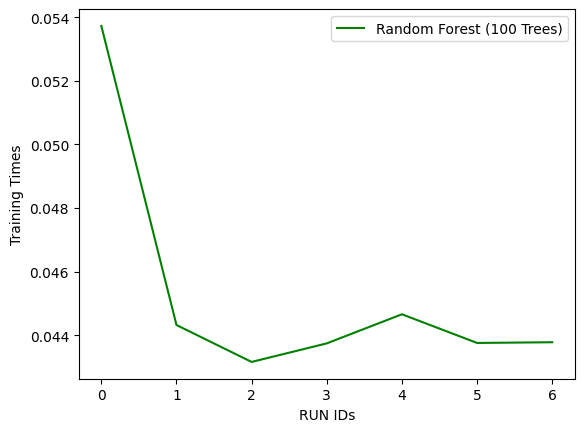

In [117]:
plt.plot(range(NBR_RUN_2), train_times_2["forest"], color="green", label="Random Forest (100 Trees)")
plt.ylabel("Training Times")
plt.xlabel("RUN IDs")
plt.legend()
# plt.rcParams["figure.figsize"] = (3,7)
plt.show()

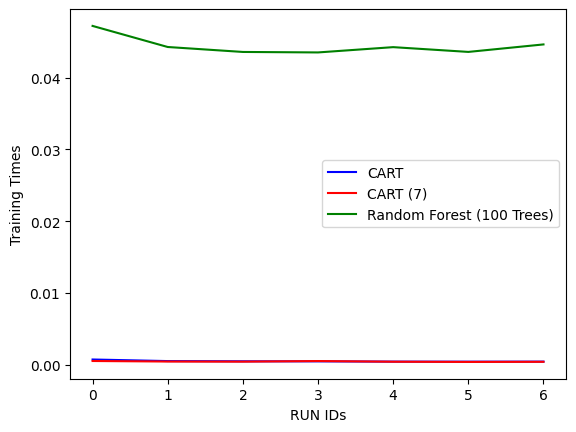

In [100]:
plt.plot(range(NBR_RUN_2), train_times_2["cart_2"], color="blue", label="CART")
plt.plot(range(NBR_RUN_2), train_times_2["cart7_2"], color="red", label="CART (7)")
# plt.plot(range(NBR_RUN_2), train_times_2["forest"], color="green", label="Random Forest (100 Trees)")
plt.ylabel("Training Times")
plt.xlabel("RUN IDs")
plt.legend()
# plt.rcParams["figure.figsize"] = (3,7)
plt.show()

**The training times of the forests are so large that they cannot be compared with each other in a graph**

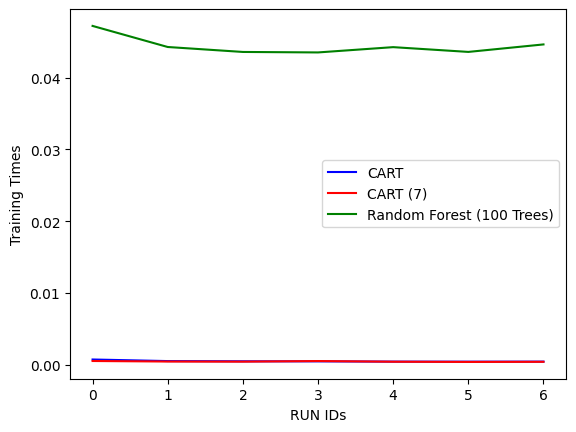

In [94]:
plt.plot(range(NBR_RUN_2), train_times_2["cart_2"], color="blue", label="CART")
plt.plot(range(NBR_RUN_2), train_times_2["cart7_2"], color="red", label="CART (7)")
plt.plot(range(NBR_RUN_2), train_times_2["forest"], color="green", label="Random Forest (100 Trees)")
plt.ylabel("Training Times")
plt.xlabel("RUN IDs")
plt.legend()
# plt.rcParams["figure.figsize"] = (3,7)
plt.show()

### Convergence

In [95]:
# Convergence
pd.DataFrame(conv_2)

,cart_2,cart7_2,forest
0,1.0,0.960894,1.0
1,1.0,0.960894,1.0
2,1.0,0.960894,1.0
3,1.0,0.960894,1.0
4,1.0,0.960894,1.0
5,1.0,0.960894,1.0
6,1.0,0.960894,1.0


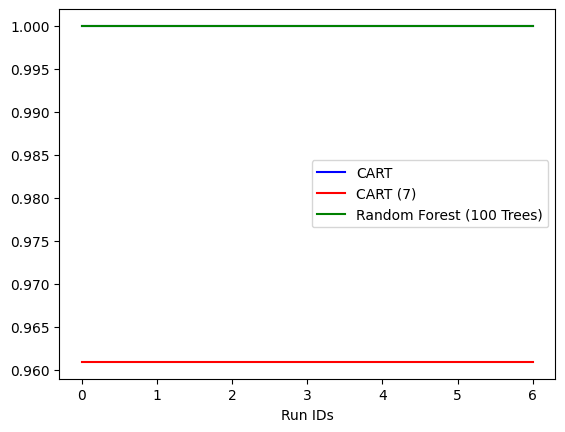

In [96]:
plt.plot(range(NBR_RUN_2), conv_2["cart_2"], color="blue", label="CART")
plt.plot(range(NBR_RUN_2), conv_2["cart7_2"], color="red", label="CART (7)")
plt.plot(range(NBR_RUN_2), conv_2["forest"], color="green", label="Random Forest (100 Trees)")
plt.xlabel("Run IDs")
plt.legend()
plt.show()

**Your Answer (A3) :**
[ Write your answer here ]

- Both model have the same similar spike patterns
- Random forest takes more time to train on each run than dt models, which is due to the fact that there are multiple models trained in pararell
- Training time of random forest is more stable than in dt models, maybe because it is an average of multiple models and that smoothes the metric
- Convergence of the random forest is perfect and dt models are slightly lower but both are on the high levels

### 3-4- Analysis of the evaluation on testset

**[Q4]** **Analyse the following results**:
- Test time 
- Performance on test data
- We want to know if the forests have solved the problem of decision trees.

Here, we have drawn the metrics against the runs. 
The order of the runs is not important.
The most important thing is that one model must be stable compared to another on the different runs

In [97]:
# Infrence (prediction) Times
pd.DataFrame(test_times_2)

,cart_2,cart7_2,forest
0,0.000070,0.000118,0.001470
1,0.000072,0.000052,0.001471
2,0.000057,0.000050,0.001476
3,0.000059,0.000049,0.001512
4,0.000051,0.000046,0.001465
5,0.000048,0.000045,0.001490
6,0.000054,0.000048,0.001482


### Performances

In [98]:
# Performances saved values
pd.DataFrame(perf_2)

,cart_2,cart7_2,forest
0,0.818182,0.779221,0.818182
1,0.818182,0.779221,0.818182
2,0.805195,0.766234,0.818182
3,0.766234,0.779221,0.818182
4,0.792208,0.727273,0.818182
5,0.792208,0.766234,0.818182
6,0.818182,0.753247,0.818182


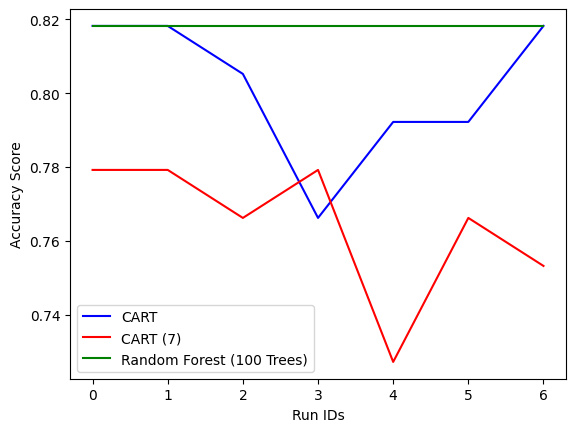

In [99]:
plt.plot(range(NBR_RUN_2), perf_2["cart_2"], color="blue", label="CART")
plt.plot(range(NBR_RUN_2), perf_2["cart7_2"], color="red", label="CART (7)")
plt.plot(range(NBR_RUN_2), perf_2["forest"], color="green", label="Random Forest (100 Trees)")
plt.ylabel("Accuracy Score")
plt.xlabel("Run IDs")
plt.legend()
plt.show()

**Your Answer (A4) :**
[ Write your answer here ]

- 

- 

### 3-5- Analysis of the effect of the number of decision trees in a random forest Model

Here, the number of decision trees in the forest is varied from 10 to 100 with a step of 5. 

**[Q5]** **Analyze the results below** :
- Training time vs. number of trees
- Convergence vs. number of trees
- Prediction time vs. number of trees
- Performance vs. number of trees

In [ ]:
# HERE, we will not apply several RUNs
nb_trees = range(10, 101, 5)

forest_nbr_temps_train = []       # An array that stores the training times of Random forests model relatively to the number of their trees
forest_nbr_conv = []              # An array that stores the convergence scores of the random forests model relatively to the number of their trees

forest_nbr_temps_test = []        # the prediction time of random forests relatively to the number of their trees
forest_nbr_perf = []              # the performance of random forests models relatively to the number of their trees

# Data Train-test split : 70%-30%
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=12) 

for nbr_trees in nb_trees: 
    # create a random forest model with diffrent number of trees "nb_trees"
    forest_nbr = RandomForestClassifier(n_estimators=nbr_trees, random_state=0) 
    
    # Training time
    start_time = timeit.default_timer()
    forest_nbr.fit(X_train, Y_train)
    forest_nbr_temps_train.append(timeit.default_timer() - start_time)
    
    # convergance (on training set)
    Y_forest_nbr_train = forest_nbr.predict(X_train)
    forest_nbr_conv.append(accuracy_score(Y_train, Y_forest_nbr_train))
    
    # Evalkuation time
    start_time = timeit.default_timer()
    forest_nbr_test = forest_nbr.predict(X_test)
    forest_nbr_temps_test.append(timeit.default_timer() - start_time)
    
    # Evaluation of performance
    forest_nbr_perf.append(accuracy_score(Y_test, forest_nbr_test))
    
print("END OF EVALUATION")

In [ ]:
plt.plot(nb_trees, forest_nbr_temps_train, color="red")
plt.ylabel("Training Time")
plt.xlabel("Number of Trees")
plt.title("Training time vs. Number of trees in the model")
plt.show()

In [ ]:
plt.plot(nb_trees, forest_nbr_conv, color="red")
plt.ylabel("Accuracy")
plt.xlabel("Number of Trees")
plt.title("Accuracy (Training) Vs. Number of trees in the model")
plt.show()

In [ ]:
plt.plot(nb_trees, forest_nbr_temps_test, color="blue")
plt.ylabel("Prediction Time")
plt.xlabel("Number of Trees")
plt.title("Prediction Time vs. number of trees in the model")
plt.show()

In [ ]:
plt.plot(nb_trees, forest_nbr_perf, color="blue")
plt.ylabel("Accuracy")
plt.xlabel("Number of Trees")
plt.title("Accuracy (test) vs. number of trees in the random forest model")
plt.show()

**Your Answer (A5) :**
[ Write your answer here ]

- 

- 

### 3-6- Analysis of the effect of the maximum depth of trees in a forest

Here, the depth of trees in the forest is varied from 1 to 10 with a step of 1. 

**[Q6]** **Analyze the following results**:
- Training time vs. number of trees
- Convergence vs. number of trees [on training data]
- Prediction time vs. number of trees
- Performance vs. number of trees [on unssen data, the test set]

In [ ]:
# HERE, we will not apply several RUNs
depths_trees = range(1, 11)

forest_depth_time_train = []      
forest_depth_conv = []            
forest_depth_time_test = []       
forest_depth_perf = []             

# Data train-test split 70%-30%
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=12) 

for depth_trees in depths_trees: 
    # create a random forest model with diffrent number of Max-Depth
    forest_depth = RandomForestClassifier(n_estimators=40, random_state=0, max_depth=depth_trees)
    
    # Training time
    start_time = timeit.default_timer()
    forest_depth.fit(X_train, Y_train)
    forest_depth_time_train.append(timeit.default_timer() - start_time)
    
    # convergance (on training set)
    Y_forest_depth_train = forest_depth.predict(X_train)
    forest_depth_conv.append(accuracy_score(Y_train, Y_forest_depth_train))
    
    # Evaluation timing
    start_time = timeit.default_timer()
    forest_depth_test = forest_depth.predict(X_test)
    forest_depth_time_test.append(timeit.default_timer() - start_time)
    
    # Evaluation of performance
    forest_depth_perf.append(accuracy_score(Y_test, forest_depth_test))

print("FIN EVALUATION")

In [ ]:
plt.plot(depths_trees, forest_depth_time_train, color="red")
plt.ylabel("Training Time")
plt.xlabel("Depth of the decision trees")
plt.title("Training Time vs. the depth of the decision trees")
plt.show()

In [ ]:
plt.plot(depths_trees, forest_depth_conv, color="red")
plt.ylabel("Accuracy")
plt.xlabel("Depth of the decision trees")
plt.title("Accuracy [Training] vs. the depth of the decision trees")
plt.show()

In [ ]:
plt.plot(depths_trees, forest_depth_time_test, color="blue")
plt.ylabel("Inference Time")
plt.xlabel("Depth of the decision trees")
plt.title("Inference Time vs. the depth of the decision trees")
plt.show()

In [ ]:
plt.plot(depths_trees, forest_depth_perf, color="red")
plt.ylabel("Accuracy")
plt.xlabel("Depth of the decision trees")
plt.title("Accuracy [Test set / Evaluation] vs. the depth of the decision trees")
plt.show()

**Your Answer (A6) :**
[ Write your answer here ]

- 

- 

### 3-7- Analysis of the effect of The minimum number of samples required to split an internal node

Here, the minimum number of samples in the random forest model is varied from 2 to 10 with a step of 5. 

**[Q7]** **Analyze the results below** :
- Training time vs. number of trees
- Convergence vs. number of trees
- Prediction time vs. number of trees
- Performance vs. number of trees

In [ ]:
# HERE, we will not apply several RUNs
minSamples_node = range(2, 11)

forest_minSample_time_train = []       
forest_minSample_conv = []             

forest_minSample_time_test = []        
forest_minSample_perf = []             

# Data train-test split 70%-30%
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=12) 

for minSample in minSamples_node: 
    # create a random forest model with diffrent The minimum number of samples required to split an internal node
    forest_minSample = RandomForestClassifier(n_estimators=40, random_state=0, max_depth=6, min_samples_split = minSample)
    
    # Training time
    start_time = timeit.default_timer()
    forest_minSample.fit(X_train, Y_train)
    forest_minSample_time_train.append(timeit.default_timer() - start_time)
    
    # convergance (on training set)
    Y_forest_minSample_train = forest_minSample.predict(X_train)
    forest_minSample_conv.append(accuracy_score(Y_train, Y_forest_minSample_train))
    
    # Evaluation timing
    start_time = timeit.default_timer()
    forest_minSample_test = forest_minSample.predict(X_test)
    forest_minSample_time_test.append(timeit.default_timer() - start_time)
    
    # Evaluation of performance
    forest_minSample_perf.append(accuracy_score(Y_test, forest_minSample_test))

print("FIN EVALUATION")

In [ ]:
plt.plot(minSamples_node, forest_minSample_time_train, color="red")
plt.ylabel("Training Time")
plt.xlabel(" The minimum number of samples to split ")
plt.title("Training Time vs.  The minimum number of samples to split")
plt.show()

In [ ]:
plt.plot(minSamples_node, forest_minSample_conv, color="red")
plt.ylabel("Accuracy")
plt.xlabel("The minimum number of samples to split ")
plt.title("Accuracy [Training set] vs. the depth of the decision trees")
plt.show()

In [ ]:
plt.plot(minSamples_node, forest_minSample_time_test, color="blue")
plt.ylabel("Inference Time")
plt.xlabel("The minimum number of samples to split ")
plt.title("Inference Time vs. The minimum number of samples to split")
plt.show()

In [ ]:
plt.plot(minSamples_node, forest_minSample_perf, color="red")
plt.ylabel("Accuracy")
plt.xlabel(" The minimum number of samples to split ")
plt.title("Accuracy [Test set / Evaluation] vs. The minimum number of samples to split")
plt.show()

**Your Answer (A7) :**
[ Write your answer here ]

- 

- 

**[Q8]** Now that you have manually tuned your random forest model and tried with diffrent paramaters (in literature they call them hyperparameters) and ploted several plots and made a good analysis : 
- By intuition, what are the optimal hyperparameter for the good models to solve our car classification problem ?

**Your Answer (A8) :**
[ Write your answer here ]

- 

- 

## References 
1. Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 2nd Ed. Packt Publishing, 2017.
2. Scikit-learn Documentation, (https://scikit-learn.org/stable/modules/ensemble.html